# Salinity profile of CP04OSPM
Daily mean of salinity on 01 May 2015

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

plt.rcParams.update({'figure.figsize':(15,5),'font.size':18})

In [2]:
dataDir = f'/scratch2/shared/ooi-pioneer'

In [3]:
%%time
CP04OSPM = dataDir + '/20201202T013321038Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered'
ds = xr.open_mfdataset(f'{CP04OSPM}/*.nc')
ds = ds.swap_dims({'obs':'time'})

CPU times: user 200 ms, sys: 80.1 ms, total: 280 ms
Wall time: 794 ms


In [4]:
ds

<xarray.Dataset>
Dimensions:                                          (time: 976613)
Coordinates:
    obs                                              (time) int32 0 1 ... 976612
    lon                                              (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
  * time                                             (time) datetime64[ns] 20...
    lat                                              (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    depth                                            (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
Data variables:
    practical_salinity                               (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity_qc_results       (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature_qartod_executed   (time) object dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_pressure_qc_executed          (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature_qc_results        (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    density_qc_executed                              (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    driver_timestamp                                 (time) datetime64[ns] dask.array<chunksize=(976613,), meta=np.ndarray>
    id                                               (time) |S36 dask.array<chunksize=(976613,), meta=np.ndarray>
    conductivity                                     (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    practical_salinity_qc_results                    (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    temperature                                      (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    density                                          (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_pressure                      (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    internal_timestamp                               (time) datetime64[ns] dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity_qartod_results   (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity_qc_executed      (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature_qartod_results    (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature                   (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    ingestion_timestamp                              (time) datetime64[ns] dask.array<chunksize=(976613,), meta=np.ndarray>
    port_timestamp                                   (time) datetime64[ns] dask.array<chunksize=(976613,), meta=np.ndarray>
    pressure                                         (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity_qartod_executed  (time) object dask.array<chunksize=(976613,), meta=np.ndarray>
    deployment                                       (time) int32 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_pressure_qc_results           (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    preferred_timestamp                              (time) object dask.array<chunksize=(976613,), meta=np.ndarray>
    practical_salinity_qc_executed                   (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_conductivity                  (time) float64 dask.array<chunksize=(976613,), meta=np.ndarray>
    density_qc_results                               (time) uint8 dask.array<chunksize=(976613,), meta=np.ndarray>
    ctdpf_ckl_seawater_temperature_qc_executed       (time) uint8 dask.array<chunksize=(976613,), m

roughly 1M points at the same lat lon over time. Varying in depth.

### full S time series

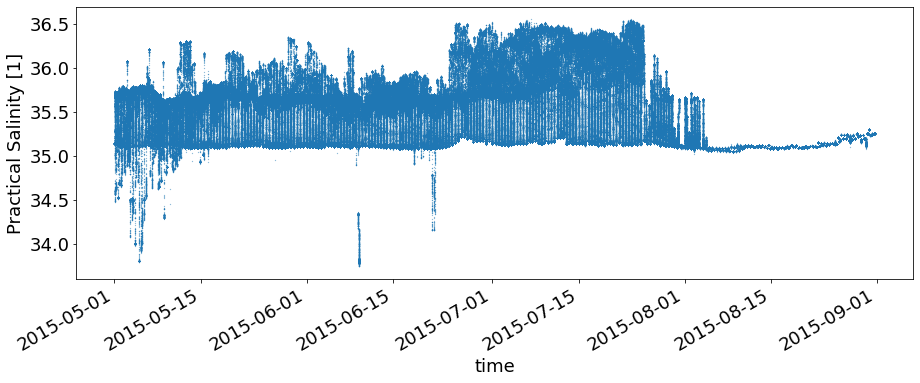

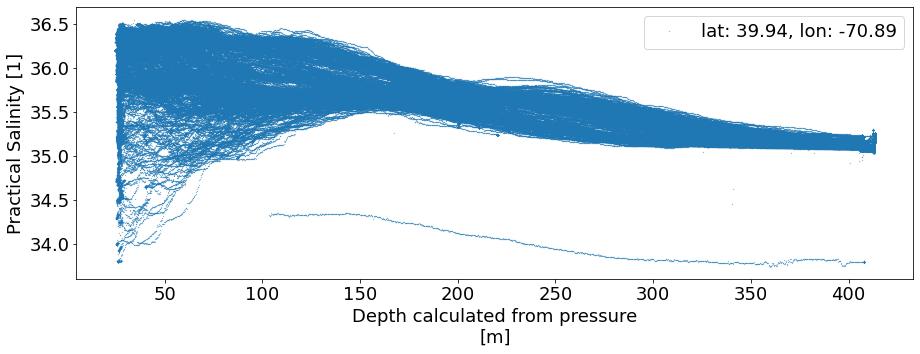

In [5]:
ds['practical_salinity'].plot(marker='o', linewidth=0.,\
                              markersize=0.2)

location = ('lat: %0.2f, lon: %0.2f' \
            %(ds.coords['lat'][0].values,ds.coords['lon'][0].values))

plt.figure()
ds['practical_salinity'].plot(x='depth', label=location, \
                              marker='o', linewidth=0.,\
                              markersize=0.2)
plt.legend()

### Slice a single day

We save a smaller time interval from the global time. We will take the time mean of that interval to create the vertical profile. 

In [5]:
ds01May15 = ds.sel(time=slice("2015-05-01", "2015-05-02T00:00"))

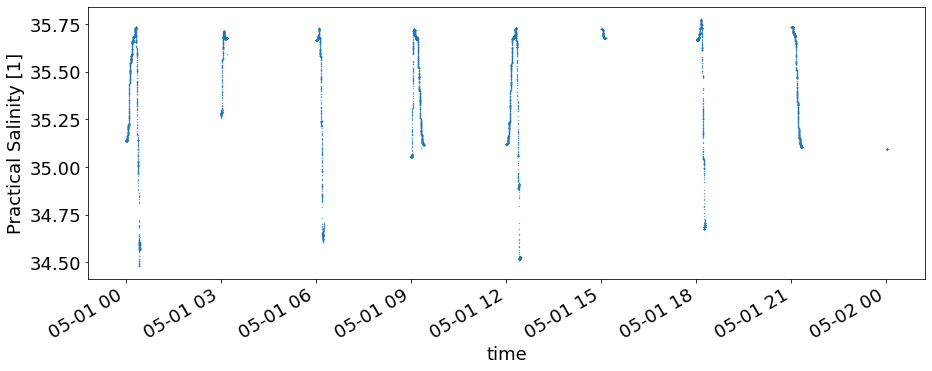

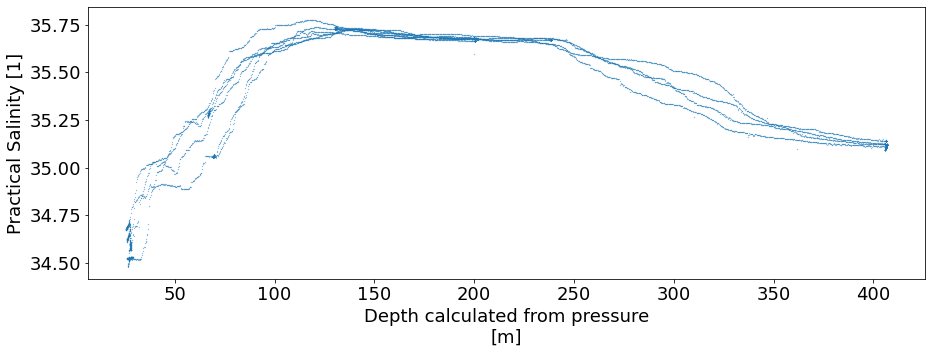

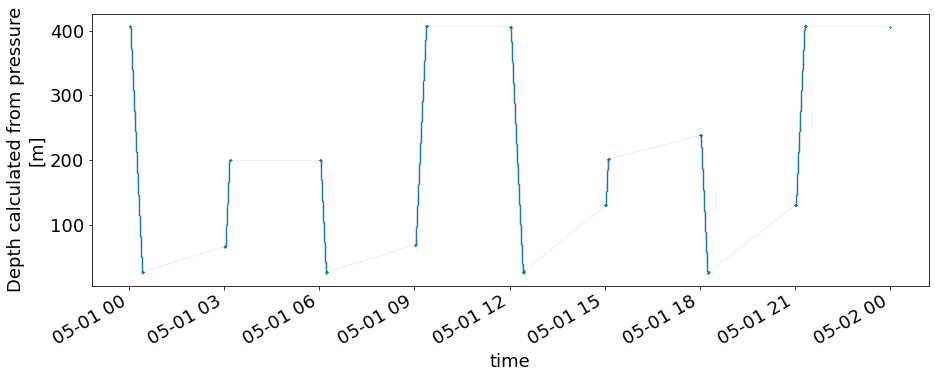

In [18]:
ds01May15['practical_salinity'].plot(x='time', \
                              marker='o', linewidth=0.,\
                              markersize=0.3)

plt.figure()
ds01May15['practical_salinity'].plot(x='depth', \
                              marker='o', linewidth=0.,\
                              markersize=0.2)
plt.show()

plt.figure()
ds01May15.coords['depth'].plot(x='time', \
                              marker='o', linewidth=0.1,\
                              markersize=0.2)
plt.show()

Flip the plot. 

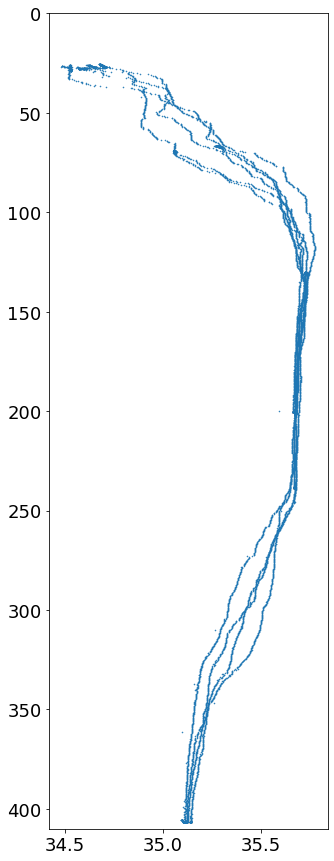

In [7]:
plt.figure(figsize=(5,15))
plt.scatter(ds01May15['practical_salinity'], ds01May15.coords['depth'],\
        s=0.3)
plt.ylim(410,0)
plt.show()

### Investigate distribution of Salinity in the time interval

Will only use **binEdge** to take time means in along depth intervals. **binEdge** is a list of depths that increment by $\Delta z = 1$ m.

In [8]:
zMax = max(ds01May15.coords['depth'].values)
binEdge = np.linspace( 0, np.ceil(zMax), num=int(np.ceil(zMax)+1) )

In [9]:
hist,_=np.histogram(ds01May15.coords['depth'], bins=binEdge)

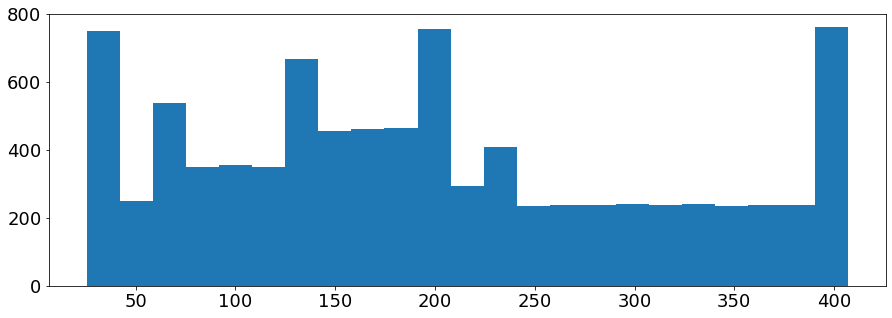

In [10]:
plt.hist(ds01May15.coords['depth'], bins='auto')
plt.show()

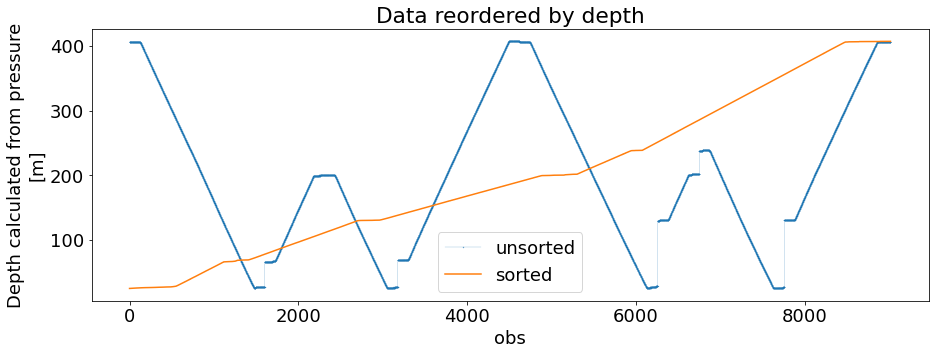

In [11]:
plt.figure()
ds01May15.coords['depth'].plot(x='obs', label='unsorted', \
                              marker='o', linewidth=0.2,\
                              markersize=0.3)
plt.plot(ds01May15['practical_salinity'].sortby('depth').coords['depth'], label='sorted')
plt.title('Data reordered by depth')
plt.legend()

plt.show()

We don't need to reorder with **xarray**, but it's nice to know how.

### Testing time mean over a single depth interval

Looking at all salinity data between 26 and 27 m for *01 May 2015*.

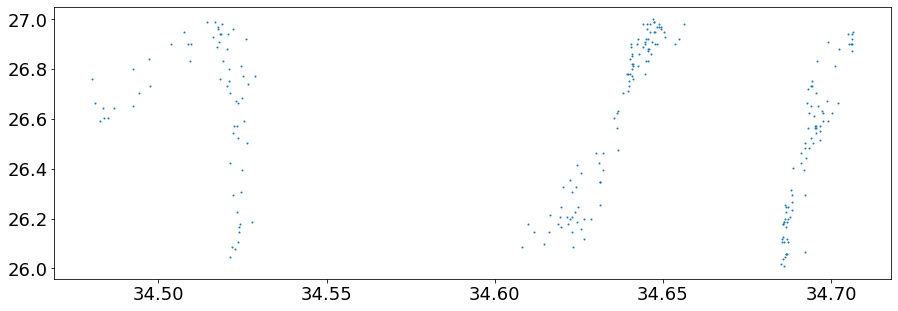

In [12]:
test = ds01May15['practical_salinity'].where((ds01May15.coords['depth'] < 27) & \
                                             (ds01May15.coords['depth'] >= 26))

plt.figure()
plt.scatter(test, test.coords['depth'],\
        s=1)
plt.show()

In [13]:
test.mean('time').values

array(34.62329324)

### Apply mean over all depth intervals

The mean values are assigned to the bottom bound of the interval. So in the interval from 26 to 27 m, the time mean value is stored at 26 m depth. 

In [14]:
salDict = dict.fromkeys(binEdge, [])
dz = binEdge[1]-binEdge[0]

In [15]:
for z in salDict:
    tmp = ds01May15['practical_salinity'].where((ds01May15.coords['depth'] >= z) & \
                                                (ds01May15.coords['depth'] < z+dz) )
    salDict[z] = tmp.mean('time').values

### Plot salinity profile

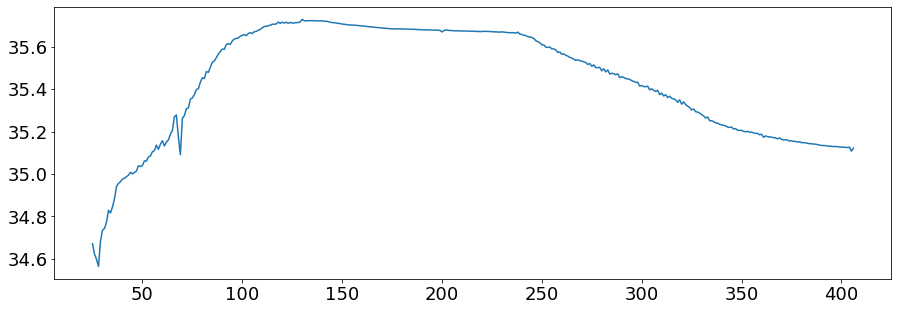

In [16]:
plt.plot(*zip(*sorted(salDict.items())))
plt.show()

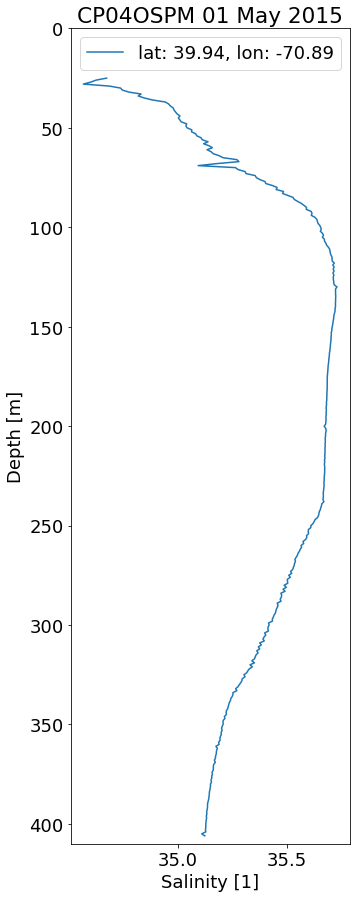

In [21]:
location = ('lat: %0.2f, lon: %0.2f' \
            %(ds.coords['lat'][0].values,ds.coords['lon'][0].values))

plt.figure(figsize=(5,15))
plt.plot(salDict.values(), salDict.keys(), label=location)
plt.ylim(410,0)
plt.legend()

plt.xlabel('Salinity [1]')
plt.ylabel('Depth [m]')
plt.title('CP04OSPM 01 May 2015')
plt.show()

<sub>Written by I. Escobar on 10 Dec 2020, 03 Sept 2021</sub>